# Assignment: Clustering and association rule mining

We have two datasets, drone_cust_locations and drone_prod_groups.
The first one contains clientID, x and y coordinates. Second contains transaction id, and products from 1 to 20.

## Tasks:

1. Find optimal hub locations
2. Find interesting relationships between product groups

## Data Preparation

- Assign the data to variables df and products.
- Drop columnns that are not needed. (clientID and transactionId)
- Change the data to true or false in products set.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


df = pd.read_csv("../datasets/drone_cust_locations.csv", delimiter=";")
products = pd.read_csv("../datasets/drone_prod_groups.csv")
products = products.drop(columns="ID")
products = products.astype(bool)

df.drop(columns=["clientid"], inplace=True)

df.head()

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298


# Part 1

Visualize the client locations by making a two-dimensional scatterplot. Can you give a geographic interpretation for what you see? Using k-means clustering, find optimal locations (i.e. x and y coordinates) for three drone depots. Each depot should serve its surrounding clients.

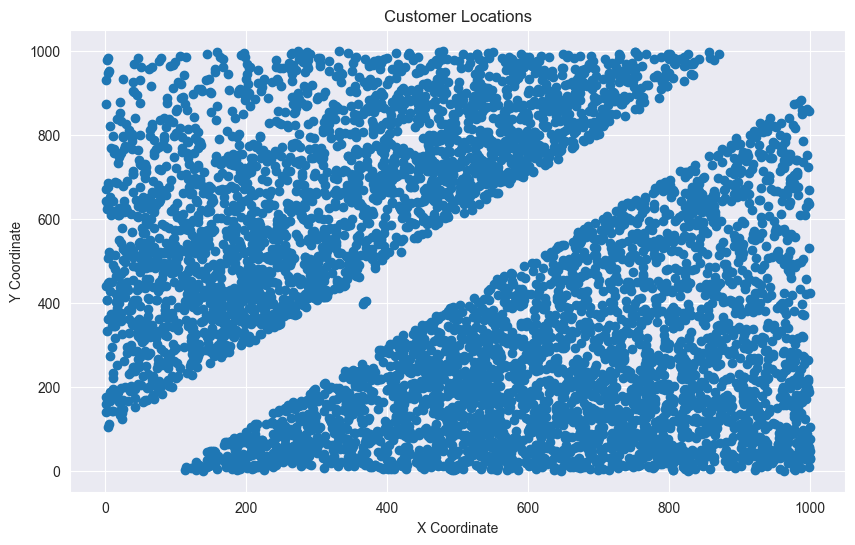

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df["x"], df["y"])
plt.title("Customer Locations")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

 Customer locations visualized on a 2 dimensional scatterplot.

In [39]:
from sklearn.cluster import KMeans

model = KMeans(init='random', n_clusters=3, random_state=42)
model.fit(df)

labels = model.labels_
centroid = model.cluster_centers_
print(centroid)
print('Silhouette score = %.2f' % silhouette_score(df, labels))
df["depots"] = labels
df.head(10)


[[702.08109226 211.2703835 ]
 [198.44098904 383.25861847]
 [548.20586479 787.2788963 ]]
Silhouette score = 0.42


,x,y,depots
0,622.771572,164.857623,0
1,416.357298,630.193634,2
2,292.735020,567.333231,1
3,737.211288,166.225676,0
4,540.475375,682.912298,2
5,535.469492,318.439661,0
6,640.380050,870.833221,2
7,235.772075,359.048203,1
8,481.896884,661.491838,2
9,730.032789,312.177817,0


2. This attaches the information on the closest depot to each client.

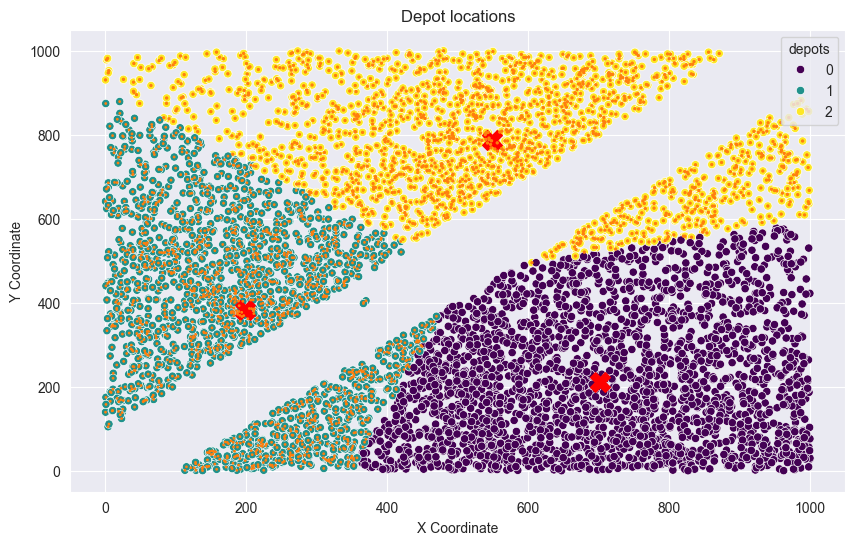

In [40]:
import seaborn as sns

plt.figure(figsize=(10,6))

sns.scatterplot(x=df["x"], y=df["y"], hue=df["depots"], palette="viridis")
plt.scatter(centroid[:, 0], centroid[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.scatter(df["x"], df["y"], df["depots"])
plt.title("Depot locations")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

3. This shows the optimal depot locations (with three different colors) after clustering the customer locations and finding the centroids.

In [41]:

model = KMeans(init='random', n_clusters=10, random_state=42)
model.fit(df)

labels = model.labels_
centroid = model.cluster_centers_
print(centroid)
print('Silhouette score = %.2f' % silhouette_score(df, labels))
df["depots"] = labels
df.head(10)

[[8.81102184e+02 6.35218208e+02 1.51010101e+00]
 [4.52077320e+02 7.67462529e+02 2.00000000e+00]
 [7.32737461e+02 4.01799731e+02 1.69934641e-01]
 [3.08100798e+02 8.73222567e+01 7.92635659e-01]
 [8.49630709e+02 1.28412048e+02 2.22044605e-15]
 [6.48685751e+02 8.95594425e+02 2.00000000e+00]
 [1.07447469e+02 3.65004309e+02 1.00000000e+00]
 [1.52507282e+02 7.99996743e+02 1.53789731e+00]
 [5.47017165e+02 1.71366385e+02 7.17948718e-02]
 [2.50113671e+02 5.34298762e+02 1.07964602e+00]]
Silhouette score = 0.37


,x,y,depots
0,622.771572,164.857623,8
1,416.357298,630.193634,1
2,292.735020,567.333231,9
3,737.211288,166.225676,4
4,540.475375,682.912298,1
5,535.469492,318.439661,8
6,640.380050,870.833221,5
7,235.772075,359.048203,6
8,481.896884,661.491838,1
9,730.032789,312.177817,2


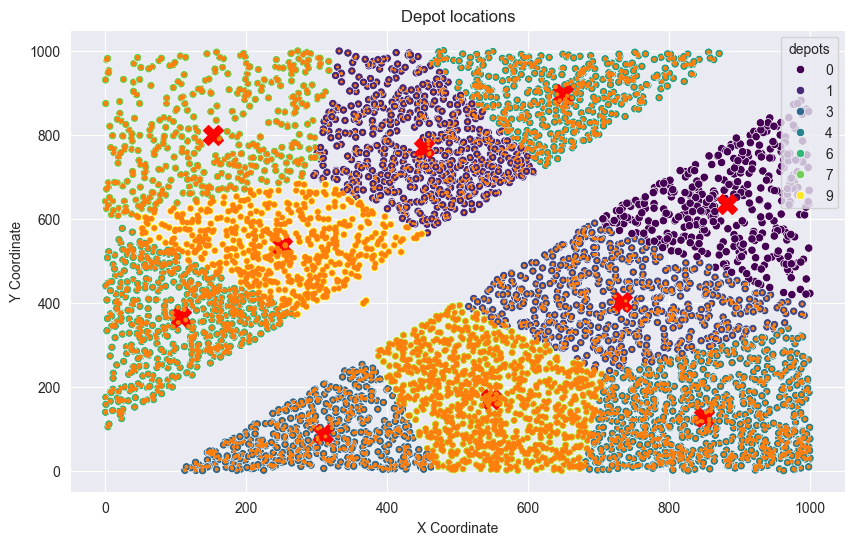

In [42]:
import seaborn as sns

plt.figure(figsize=(10,6))

sns.scatterplot(x=df["x"], y=df["y"], hue=df["depots"], palette="viridis")
plt.scatter(centroid[:, 0], centroid[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.scatter(df["x"], df["y"], df["depots"])
plt.title("Depot locations")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

4. There doesn't seem to be much difference in computation time.

# Part 2

Use association rule mining to find interesting relationships between product groups.



In [43]:
products.head()

,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod9,Prod10,Prod11,Prod12,Prod13,Prod14,Prod15,Prod16,Prod17,Prod18,Prod19,Prod20
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
3,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True


In [44]:
frequent_itemsets = apriori(products, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.10998,(Prod1)
1,0.13098,( Prod2)
2,0.10459,( Prod5)
3,0.13499,( Prod7)
4,0.16179,( Prod8)
5,0.19853,( Prod9)
6,0.10848,( Prod11)
7,0.15971,( Prod12)
8,0.14557,( Prod14)
9,0.11880,( Prod15)


Finding the itemsets that have the minimum support of 0.1.

Support measures how frequently an itemset appears in the dataset.

For example if itemset appears 10 out of 100 transactions, its support is 0.1 or 10%

In [45]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

rules = rules.sort_values(by='confidence', ascending=False)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,( Prod15),( Prod9),0.11880,0.19853,0.11145,0.938131,4.725388,1.0,0.087865,12.954372,0.894663,0.541335,0.922806,0.749754
3,( Prod20),( Prod19),0.14798,0.20626,0.13476,0.910664,4.415125,1.0,0.104238,8.884845,0.907849,0.613997,0.887449,0.782007
2,( Prod19),( Prod20),0.20626,0.14798,0.13476,0.653350,4.415125,1.0,0.104238,2.457869,0.974508,0.613997,0.593144,0.782007
0,( Prod9),( Prod15),0.19853,0.11880,0.11145,0.561376,4.725388,1.0,0.087865,2.009011,0.983664,0.541335,0.502243,0.749754


Product 15 and Product 9 have a lift of 4.7, which means that they are bought together 4.7 times more frequently than if they were bought independently.


## Recommendation for increasing revenue

- Since product 15 and 9 have a lift value of 4,7, indicating they are bought together frequently, you could consider bundling these products, offering a discount on this bunlde could encourage customers to purchase both items together, increasing sales.

- If its a physical store, companys could place frequently associated product close to each other.

- Target ads. People who bought product 15, could receive offers for product 9 for special deal.

